# Travelling salesman using Stochastic Search 
Most optimal answer for the given dataset is **33551**

### Loading libraries

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

### Loading data

In [8]:
data=np.loadtxt("distance_matrix.txt")

### Plotting the graph using networkx library

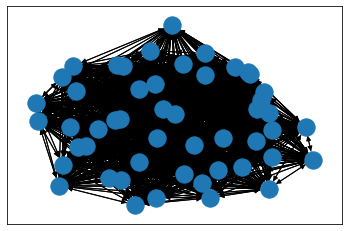

In [9]:
import networkx as nx
#plotting the graph
G = nx.from_numpy_matrix(np.matrix(data), create_using=nx.DiGraph)
layout = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edges(G, pos=layout)
nx.draw_networkx_nodes(G,pos=layout)
plt.show()

# Choose population size and number of iterations here and tweak this parameters for getting the solution closer to optimal.

In [10]:
m=144 # population size (m)
numIter=2000 #number of iterations

#Negate the distance values because objective is to minimize distance but stachastic search is used for maximize objective
#Hence we negate the distance values and try the maximum of it so the returned objective will be the minimum of the distances

### Helper Functions

In [11]:
def calcDistance(cities, startIdx=0):
    #given the array of cities in order, this function calculates the total distance for rountrip
    #from startIdx
    dist=0
    n=len(cities)
    for i in range(startIdx,startIdx+n):
        dist+=data[cities[i%n]][cities[(i+1)%n]]
    return -dist

def generateYt(S):
    #Generates yt (or cost array) of S
    return np.array([calcDistance(S[i]) for i in range(len(S))])

def generateUt(y):
    #generates non negative scores of yt
    return y-min(y)

def generatePt(u):
    #generated fitness scores of ut
    sum_ut=sum(u)
    return u/sum_ut

def generateChild(parent):
    #Generates child by randomly swapping two indices
    idx = range(len(parent))
    i1, i2 = random.sample(idx, 2)
    child=np.copy(parent)
    child[i1],child[i2] = child[i2],child[i1]
    return child

def choose_best_m(s1,s2,y1,y2,m):
    #chooses m values with least cost from s1 and s2
    #(or) best of s1 U s2
    topList=[]
    #each element of topList is stored in format [cost, position, index]
    #if the cost comes from y1, then position is 1, if y2, position is 2
    for i in range(len(y1)):
        topList.append([y1[i], 1, i])
    for i in range(len(y2)):
        topList.append([y2[i], 2, i])
    
    topList.sort(reverse=True) #we now sort topList by 0th element
    s=[] #our final list containing top m paths
    y=[] #cost array of s
    for i in range(m):
        cost,pos,idx=topList[i] #pos is required to know whether the path comes from s1 or s2
        y.append(cost)
        if pos==1:
            s.append(list(s1[idx]))
        if pos==2:
            s.append(list(s2[idx]))
    return np.array(s),np.array(y)

### Random Initialization 

In [12]:
#Generating S0 and y0 randomly (random initialization)
S0=[]
y0=[]

cities=[i for i in range(len(data))]
for i in range(m):
    np.random.shuffle(cities)
    y0.append(calcDistance(cities))
    S0.append(list(cities))
S0=np.array(S0)
y0=np.array(y0)

### Running the Stochaistic Search algorithm

In [13]:
S=S0 #same as S_t
y=y0 #same as y_t
y_opt=y[0] #we will check for optimum solution at each and every step
path_opt=S[0]
for i in range(numIter):
    u=generateUt(y) #generate as u_t
    p=generatePt(u) #generate as p_t
    p=np.around(p*m) #rounding off p x m
    p=np.int64(p) #converting float to int for indexing purposes
    S_new=[] #same as S_t+1
    #generating children by fitness score and storing in S_new
    #we generate K children for S[i] if p[i]=K
    for j in range(len(S)):
        for k in range(p[j]):
            S_new.append(list(generateChild(S[j])))
            
    S_new=np.array(S_new) #converting to numpy array for easier operations
    y_new=generateYt(S_new)
    S,y=choose_best_m(S,S_new,y,y_new,m) #we choose best m out of S and S_new
    
    #checking for optimum solution
    for i in range(m):
        if y[i]>y_opt:
            y_opt=y[i]
            path_opt=S[i]
y_opt=-y_opt  


### Printing our final results

In [14]:
#our final answer
print("Our optimal Path")
for i in range(len(path_opt)):
    print(path_opt[i],end=" -> ")
print(path_opt[0],end="\n\n")
print("Cost of our optimal path")
print(y_opt)

Our optimal Path
10 -> 39 -> 18 -> 43 -> 11 -> 21 -> 42 -> 6 -> 14 -> 45 -> 36 -> 19 -> 25 -> 7 -> 49 -> 32 -> 22 -> 3 -> 26 -> 24 -> 37 -> 47 -> 28 -> 17 -> 41 -> 31 -> 33 -> 44 -> 29 -> 0 -> 5 -> 46 -> 8 -> 4 -> 15 -> 30 -> 1 -> 9 -> 2 -> 13 -> 27 -> 35 -> 23 -> 38 -> 16 -> 34 -> 48 -> 40 -> 20 -> 12 -> 10

Cost of our optimal path
646.8090000000001


### Optimal Results(the Best ideal result of this path )
Optimal Path:

1 -> 8 -> 38 -> 31 -> 44 -> 18 -> 7 -> 28 -> 6 -> 37 -> 19 -> 27 -> 17 -> 43 -> 30 -> 36 -> 46 -> 33 -> 20 -> 47 -> 21 -> 32 -> 39 -> 48 -> 5 -> 42 -> 24 -> 10 -> 45 -> 35 -> 4 -> 26 -> 2 -> 29 -> 34 -> 41 -> 16 -> 22 -> 3 -> 23 -> 14 -> 25 -> 13 -> 11 -> 12 -> 15 -> 40 -> 9 -> 1

Cost of optimal path
**33551**

Stochastic Search algorithm is evolutionary algorithm in which children are generated by random swaps and getting the best out of the paths after every iteration and hence the paths are obtained by random children generation which might not be close to the best optimal path possible.We are randomly generating paths and collecting all of the paths generated together and picking the nest one out of them.Hence it cannot be optimal sometimes and tweak the number of iterations and populations size to get the nearest optimal solution possible.